<a href="https://colab.research.google.com/github/FranPolo25/Housedata/blob/main/M%C3%B3dulo_7_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


El oriinal se llama house - tiramos country, el siguiente casa - pasamos la fecha a tipo fecha, pasamos la fecha original a valor de int, trabajamos un rato con casa , el ultimo casaf es el arreglo de dataframes de house

In [ ]:
import pandas as pd
house = pd.read_csv("/content/drive/MyDrive/Data Science/Archivos Excel/housedata.csv")
house
casa = house.copy()
#Cada fila representa un inmueble vendido/comprado con toda su informacion

In [ ]:
house.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
house.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [ ]:
#Pasar nuestra columna de fecha tipo object a datos de tipo fecha en distintas columnas año/mes/fecha
casa['date'] = pd.to_datetime(house['date'])
casa['year']  =  casa['date'].dt.year
casa['month'] = casa['date'].dt.month
casa ['day']  = casa['date'].dt.day

In [ ]:
#Ordinal Encoding para pasar nuestras variables tipo Object a valor numericos (Categoricos a numericos)
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Podemos eliminar nuestra variable de pais ya que no influye dentro de nuestro analsiis
house.drop('country', axis=1, inplace=True)

In [ ]:
#Pasar nuestra variable de fecha a un formato int
casa['date'] = casa['date'].astype(int)
casa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month,day
0,1398988800000000000,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,...,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,2
1,1398988800000000000,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,...,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5,2
2,1398988800000000000,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,...,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,2
3,1398988800000000000,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,...,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,2
4,1398988800000000000,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,...,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,1404864000000000000,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,...,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,7,9
4596,1404864000000000000,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,...,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,7,9
4597,1404864000000000000,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,...,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,7,9
4598,1404950400000000000,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,...,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2014,7,10


In [ ]:
#Pasar nuestro dataframe a variables numericas, transformando nuestros valores categoricos a numericos mediante el ordinal encoder
for col in casa.columns:
    if casa[col].dtype == 'object':
        casa[col] = OrdinalEncoder().fit_transform(casa[[col]])
X_train = casa.to_numpy()
print(X_train)

[[1.39898880e+18 3.13000000e+05 3.00000000e+00 ... 2.01400000e+03
  5.00000000e+00 2.00000000e+00]
 [1.39898880e+18 2.38400000e+06 5.00000000e+00 ... 2.01400000e+03
  5.00000000e+00 2.00000000e+00]
 [1.39898880e+18 3.42000000e+05 3.00000000e+00 ... 2.01400000e+03
  5.00000000e+00 2.00000000e+00]
 ...
 [1.40486400e+18 4.16904167e+05 3.00000000e+00 ... 2.01400000e+03
  7.00000000e+00 9.00000000e+00]
 [1.40495040e+18 2.03400000e+05 4.00000000e+00 ... 2.01400000e+03
  7.00000000e+00 1.00000000e+01]
 [1.40495040e+18 2.20600000e+05 3.00000000e+00 ... 2.01400000e+03
  7.00000000e+00 1.00000000e+01]]


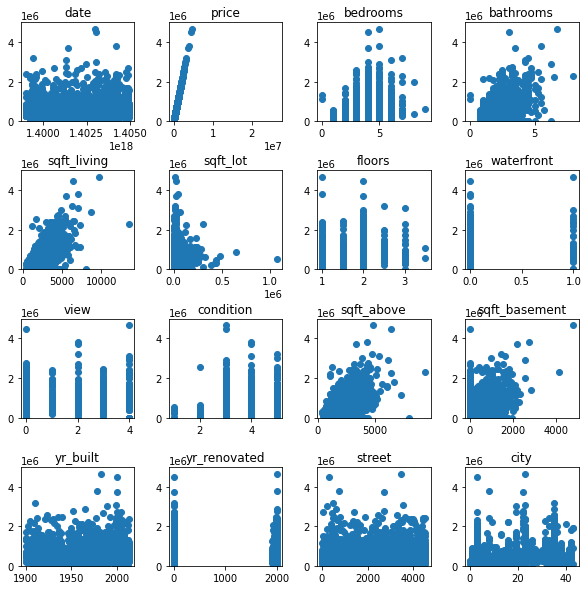

In [ ]:
#Analisis de correlacion, faltan variables a demostrar por el cuadrante, variable precio contra el resto de las variables mediante un scatterplot
v = 0
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(4):
  for j in range(4):
    axs[i,j].scatter(X_train[:,v], X_train[:,1])
    axs[i,j].set_title(casa.columns[v])
    axs[i,j].set_ylim([0,0.5e7])
    v+=1
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()
#pd.plotting.scatter_matrix(casa, figsize=(15,15),diagonal='hist')
#Vemos que hay una tendencia en unas variables que se relaciona conforme aumenta el precio, por ejemplo el sqft_living, sqft_above, mientras tegamos una tipo diagonal mientras incrementa el precio deberia incrementar la otra variable de misma manera

In [ ]:
#Agrupamiento de datos, en cuantos grupos vamos a decidir agrupar nuestro set de datos, tenemos 4600 datos, tenemos que tomar cuantas estrategias designar nuestro nuemero de agrupacion
np.random.seed(42)#Para que Kmean repita varias veces un resultado, ponerle una semilla a los resultados,
X = StandardScaler().fit_transform(X_train) #Poner nuestros valores numericos dentro de la misma escala (Estandarizando o normalizando nuestros valores numericos)
nc = 11 #Numero de agrupaciones deseado

In [ ]:
from sklearn import cluster, metrics

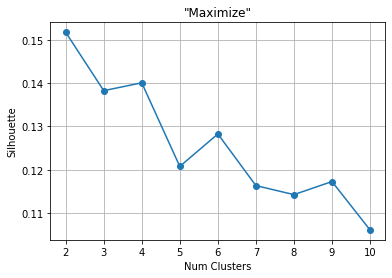

In [ ]:
results = {} #Creacion de un diccionario, tener una llave numero de grupos y el valor el numero de silhouette
for k in range(2, nc):
  k_means = cluster.KMeans(n_clusters=k).fit(X)
  y_pred = k_means.predict(X)
  results[k] = metrics.silhouette_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(clusters_counts)
plt.ylabel('Silhouette')
plt.show()

In [ ]:
k = 4
k_means = cluster.KMeans(n_clusters = k)
y_pred = k_means.fit_predict(X)
y_pred

array([1, 3, 2, ..., 0, 1, 2], dtype=int32)

In [ ]:
house['group'] = y_pred
house

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,group
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,1
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,3
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,2
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,2
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,1
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,2
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,0
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,1


In [ ]:
#Segmentacion del mercado, dividimos en dataframe distintos de acuerdo al cluster seleccionado a cala fila de nuestro datafram original
casaf = []
for g in range(k):
  casaf.append(house[house['group']==g])
  #Se realiza un arreglo de dataframes usando el original con el numero de nucleos o clusters

In [ ]:
#Revisar la cantidad de inmuebles o filas dentro de cada grupo designado
for g in range(k):
  print('Group' + str(g), 'has', len(casaf[g]), 'houses')

Group0 has 1622 houses
Group1 has 1600 houses
Group2 has 1017 houses
Group3 has 361 houses


In [ ]:
#Ahora realizaremos un analisis de que tienen en comun estos grupos obtenidos, mediante los centroides (representates de cada grupo) que nos ayudan para describir un poco acerca de los grupos (promedios)
k_means.cluster_centers_
#4 centroides con 21 numeros de columnas o variables, estos centroides estan estandarizados/normalizados

array([[ 0.04113098,  0.05735416,  0.21966856,  0.59662896,  0.36604909,
         0.00637174,  0.98673711, -0.08500441, -0.24027992, -0.49139364,
         0.6609545 , -0.4681233 ,  0.8734296 , -0.36048918,  0.02264229,
         0.01035347, -0.21301945,  0.        ,  0.        ,  0.05063511,
        -0.02895485],
       [-0.01120684, -0.19329437, -0.45212641, -0.72636942, -0.5865675 ,
        -0.18943671, -0.56412276, -0.07759872, -0.13333482,  0.20694764,
        -0.66377956,  0.01573731, -0.86434158,  0.42885367,  0.08813705,
         0.63911692,  0.83385413,  0.        ,  0.        , -0.0211819 ,
         0.02556531],
       [-0.05920433, -0.24240654,  0.01332577, -0.29679238, -0.29308851,
         0.1263671 , -0.78514104, -0.08500441, -0.23465719,  0.39290541,
        -0.41620878,  0.16490256, -0.01209471, -0.10523012, -0.22741958,
        -1.00128922, -0.99278434,  0.        ,  0.        , -0.05103248,
        -0.01130497],
       [ 0.03165454,  1.28191134,  0.97935607,  1.37478321

In [ ]:
#Tratar de calcular los centroides por nosotros mismos de cada grupo obtenido, mediante el promedio o el valor mas repetido en caso de ser un valor categorico
grouped = pd.DataFrame()
grouped['Features'] = house.columns[:-1]
for g in range(k):
    arr = []
    for col in grouped['Features']:
        if casaf[g][col].dtype != 'object':
            arr.append(np.round(casaf[g][col].mean(),2))
        else:
            arr.append(casaf[g][col].value_counts().keys()[0])
    grouped['Group'+str(g)] = arr
grouped

,Features,Group0,Group1,Group2,Group3
0,date,2014-07-08 00:00:00,2014-06-25 00:00:00,2014-06-26 00:00:00,2014-07-01 00:00:00
1,price,584297.74,442988.76,415300.62,1274670.52
2,bedrooms,3.6,2.99,3.41,4.29
3,bathrooms,2.63,1.59,1.93,3.24
4,sqft_living,2491.89,1574.42,1857.07,3854.38
5,sqft_lot,15081.14,8055.43,19386.64,31177.51
6,floors,2.04,1.21,1.09,1.66
7,waterfront,0.0,0.0,0.0,0.09
8,view,0.05,0.14,0.06,2.06
9,condition,3.12,3.59,3.72,3.58
